In [6]:
import math
import random
import numpy as np
import cv2 as cv

obstacle_shape = {0: cv.MORPH_RECT, 1: cv.MORPH_CROSS, 2: cv.MORPH_ELLIPSE}

def make_map(sizeX : int, sizeY : int, obstacles_count : int = None):

    # Sanitize input
    # Check input type if they are integer or not.
    if type(sizeX) is not int:
        raise TypeError("sizeX only take integer as input.")
    if type(sizeY) is not int:
        raise TypeError("sizeY only take integer as input.")
    if type(obstacles_count) is not int and obstacles_count is not None:
        raise TypeError("obstacles_count only take integer as input.")
    
    # If obstacles_count is none random new value for them
    if obstacles_count is None:
        obstacles_count = random.randint(1,5)   
        
    # initialized a map
    map = np.zeros((sizeX, sizeY)).astype(int)  

    # place obstacle
    for i in range(obstacles_count):

        # Randomize obstacle property
        obstacle_size = (random.randint(1, math.floor(sizeX / 2)), random.randint(1, math.floor(sizeY / 2)))
        obstacle_type = obstacle_shape[random.randint(0,2)]
        obstacle_position = (sizeX - obstacle_size[0] - 1, sizeY - obstacle_size[1] - 1)
        obstacle_position = (random.randint(0, obstacle_position[0]), random.randint(0, obstacle_position[1]))

        # Temp variable x, xm, y, ym
        x = obstacle_position[0]
        y = obstacle_position[1]
        xm = x + obstacle_size[0]
        ym = y + obstacle_size[1]
        map[y:ym, x:xm] = np.bitwise_or(map[y:ym, x:xm], cv.getStructuringElement(obstacle_type, obstacle_size))
     
    
    return map

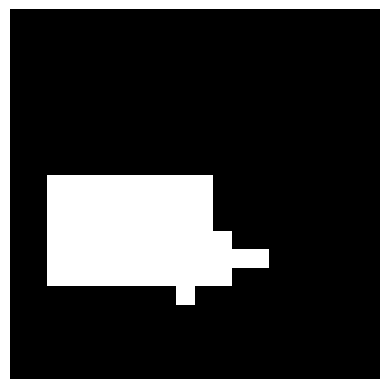

In [18]:
import matplotlib.pyplot as plt

map = make_map(20,20,3)

plt.imshow(map, cmap='grey', interpolation='nearest')
plt.axis('off')
plt.show()